In [24]:
import numpy as np
from IPython.display import clear_output
from numpy.random import seed as seed
from numpy.random import rand as rand
import matplotlib.pyplot as plt
import math
#
#import pla
import sys
sys.path.append('..')
#
#from misc.utils import MyUtils

In [25]:
seed()

In [26]:
n = 2000 #number of samples
epochs = 1000

In [27]:
r = 4  # Z space degree   #only support: degree <= 4 for demo purpose. Don't have time to code out the generic form for any degree

In [28]:
delta = 0.01

In [29]:
#messed  = True       
messed = False 
mess_percent = 0.02

In [30]:
def display_w_2D(w, color, degree = 1):
    ''' only support: degree <= 4 for demo purpose
        Don't have time to code out the generic form for any degree
    '''
    xrange = np.arange(0.0, 1.0, delta)
    yrange = np.arange(0.0, 1.0, delta)
    x1, x2 = np.meshgrid(xrange,yrange)
    
    if degree == 1:
        F = w[0] + w[1] * x1 + w[2] * x2
    elif degree == 2:
        F = w[0] + w[1] * x1 + w[2] * x2 \
            + w[3] * x1 * x1 + w[4] * x1 * x2 + w[5] * x2 * x2                 
    elif degree == 3:
        F = w[0] + w[1] * x1 + w[2] * x2 \
            + w[3] * x1 * x1 + w[4] * x1 * x2 + w[5] * x2 * x2   \
            + w[6] * x1 * x1 * x1 + w[7] * x1 * x1 * x2 + w[8] * x1 * x2 * x2 + w[9] * x2 * x2 * x2    
    elif degree == 4:
        F = w[0] + w[1] * x1 + w[2] * x2 \
            + w[3] * x1 * x1 + w[4] * x1 * x2 + w[5] * x2 * x2   \
            + w[6] * x1 * x1 * x1 + w[7] * x1 * x1 * x2 + w[8] * x1 * x2 * x2 + w[9] * x2 * x2 * x2\
            + w[10] * x1 * x1 * x1 * x1 + w[11] * x1 * x1 * x1 * x2 + w[12] * x1 * x1 * x2 * x2 + w[13] * x1 * x2 * x2 * x2 + w[14] * x2 * x2 * x2 * x2

    else:
        print('Z space degree is too high. Not supported now\n')
        quit()

    plt.contour(x1, x2, (F), [0], colors = color)

In [31]:
# generate a w_star, d = 2
def w_star_gen_2d(degree = 1):
    ''' only suppot degree <= 4 for demo purpose. 
        Don't have time to code out the generic form for any degree
    '''
    if degree == 1:
        w_star = rand(3,1) * np.sign(rand(3,1)-0.5)
    elif degree == 2:
        w_star = rand(6,1) * np.sign(rand(6,1)-0.5)
    elif degree == 3:
        w_star = rand(10,1) * np.sign(rand(10,1)-0.5)
    elif degree == 4:
        w_star = rand(15,1) * np.sign(rand(15,1)-0.5)
    
    else:
        print('Z space degree is too high. Not supported now\n')
        quit()

    return w_star

w_star: 
 [[-0.07657943]
 [ 0.10234415]
 [ 0.19542802]
 [-0.32488519]
 [ 0.32576776]
 [ 0.25414374]
 [-0.38607631]
 [ 0.46930711]
 [ 0.88471468]
 [ 0.01018432]
 [-0.48936046]
 [-0.64960458]
 [ 0.35513935]
 [ 0.80008067]
 [ 0.34848473]]


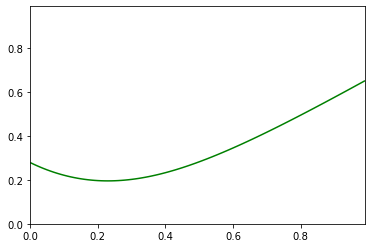

In [36]:
# randomly generate a target weight vector the PLA is going to search for
w_star = w_star_gen_2d(degree = r)
display_w_2D(w_star, color='green', degree = r)
print('w_star: \n', w_star)

In [37]:
# randomly generate the features of n samples. 
X = rand(n,2) 

Z = MyUtils.z_transform(X=X, degree = r)
Z = np.insert(Z, 0, 1, axis = 1)  # add the bias column


print(w_star)
#create the label array
y = np.sign(Z @ w_star)
to_delete = [] #index of rows to be deleted because those points sit on w_star
for i in range(n):
    if y[i] == 0:
        to_delete.append(i)

# delete those samples sitting right on w_star        
X = np.delete(X, to_delete, axis = 0)
Z = np.delete(Z, to_delete, axis = 0)
y = np.delete(y, to_delete, axis = 0)
n = n - len(to_delete)


[[-0.07657943]
 [ 0.10234415]
 [ 0.19542802]
 [-0.32488519]
 [ 0.32576776]
 [ 0.25414374]
 [-0.38607631]
 [ 0.46930711]
 [ 0.88471468]
 [ 0.01018432]
 [-0.48936046]
 [-0.64960458]
 [ 0.35513935]
 [ 0.80008067]
 [ 0.34848473]]


In [38]:
# mess up mess_percent of the samples to test pocket pla      
if messed: 
    for i in range(math.floor(n * mess_percent)):
        pos = math.floor(rand()*n)
        y[pos] = y[pos] * (-1)

In [39]:
# separate + and - samples for plotting     
pos = np.empty([1,2])
neg = np.empty([1,2])
for i in range(n):
    if y[i] == 1:
        pos = np.insert(pos, 0, X[i], 0)
    else: 
        neg = np.insert(neg, 0, X[i], 0)
# delete the init/useless row which is on the bottom        
pos = np.delete(pos, -1, 0)
neg = np.delete(neg, -1, 0)

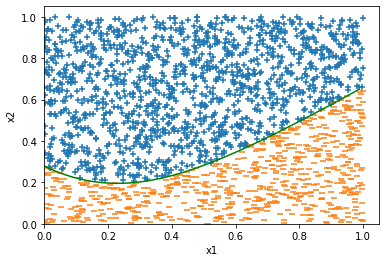

In [40]:
# display the data samples and the target classifier that PLA is tring to learn
plt.scatter(pos[:,0], pos[:,1], marker='+')
plt.scatter(neg[:,0], neg[:,1], marker='_')

display_w_2D(w_star, color = 'green', degree = r)

plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [41]:
perceptron = PLA()

r_z = r

if messed: 
    print("It's messed dawg")
    #perceptron.fit(X, y, pocket = True, epochs = epochs, degree = r_z)
else: 
    perceptron.fit(X, y, pocket = False, degree = r_z)


#print('w:\n', perceptron.w)
#print(w_star)



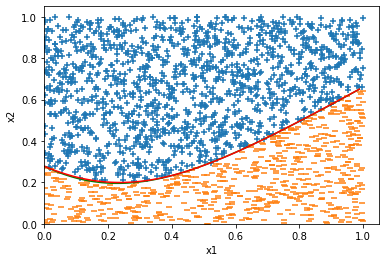

In [42]:
# display the data samples and the target classifier that PLA is tring to learn
plt.scatter(pos[:,0], pos[:,1], marker='+')
plt.scatter(neg[:,0], neg[:,1], marker='_')

display_w_2D(w_star, color = 'green', degree = r)
display_w_2D(perceptron.w, color = 'red', degree = r_z)


plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [22]:
print('misclassified counts:', perceptron.error(X,y))
print('\n')

misclassified counts: 0




In [5]:
##### >>>>>> Jordan Driscoll 985812


# Various tools for data manipulation. 



import numpy as np
import math

class MyUtils:

    
    def z_transform(X, degree = 2):
        
        ''' Transforming traing samples to the Z space
            X: n x d matrix of samples, excluding the x_0 = 1 feature
            degree: the degree of the Z space
            return: the n x d' matrix of samples in the Z space, excluding the z_0 = 1 feature.
            It can be mathematically calculated: d' = \sum_{k=1}^{degree} (k+d-1) \choose (d-1)

        '''
        # Set r to degree
        r = degree
        
        # degree $leq$ 1, return x 
        if r <= 1:
            return X
        
        # n is the number of X's rows --> The number of points
        # d is the number of X's cols --> The dimensionality 
        n,d = np.shape(X)
        
        # Z is going to be a copy of x = Starts out exactly the same 
        Z = X.copy()
        
        
        
        # next it is necessary to create all of the buckets
        # a bucket is a matrix with all the possible combinations of multiplications which acheives a certain, single degree 
        # the # of buckets is conceptuall known d -r -1 Choose d - 1 
        # let's save those numbers in an array 
        
        #there will b r buckets 
        
        # B is a list with a bunch of buckets  
        B = []
        
        
        # the number of buckets 
        for i in range(r):
            # append a number - the ith bucket size which can be calculated w/ this equation
            # math.comb = n choose k 
            m = d+i # 0-based indexing t.f. the -1 is gone, d is the size of the X matrix 
            k = d-1 
            B.append(math.comb(m,k))
    
   
        ell = np.arange(np.sum(B)) # The summation of all the elements in the B array

        q = 0 # the total size of all of the buckets before the previous bucket
        
        p = d # the size of the previous bucket
        g = p
        
        # at the beginning, there is one bucket 
        for i in range(1, r): # 1, 2, 3, ... r-1 
            
            # create each bucket up to the ith bucket, visit the previous bucket 
            #print("New I Loop\ni: ", i)
            # go through every element in the previous bucket - the range starting from q going to q+p 
            for j in range(q, p):
                head = ell[j]

        
                # this tracks the index of the new column
           
            
                # go from head to lexographically highest feature
                for k in range(head, d):

                    #elementwise multiplication
                    temp = (Z[: ,j] * X[:, k]).reshape(-1,1)
                    # insert new column temp on right side
                    Z = np.append(Z, temp, axis=1)
                    
                    # j is hte index of the column you are currently computing
                    ell[g] = k # just multiplied w/ x's k column

                    g += 1

            # adding previous bucket into p the new previous buck
            q = p 

            # the new previous bucket is going to be i which is the current i but will soon be updated 
            p += B[i] 
 

        
        assert Z.shape[1] == np.sum(B)
        
        return Z
X = np.array([[1, 2, 3], [2, 3, 4], [3, 4, 5]])
Z = MyUtils.z_transform(X, 3)
print(Z)


    
    

[[  1   2   3   1   2   3   4   6   9   1   2   3   4   6   9   8  12  18
   27]
 [  2   3   4   4   6   8   9  12  16   8  12  16  18  24  32  27  36  48
   64]
 [  3   4   5   9  12  15  16  20  25  27  36  45  48  60  75  64  80 100
  125]]


In [3]:
# Implementation of the perceptron learning algorithm. Support the pocket version for linearly unseparatable data. 
# Authro: Bojian Xu, bojianxu@ewu.edu

#Important observation: 
#    - The PLA can increase or decrease $w[0]$ by 1 per update, so if there is a big difference between $w^*[0]$ and the #initial value of $w[0]$, the PLA is likely to take a long time before it halts. However, the theoretical bound $O((L/d)^2)$ #step of course still holds, where $L = \max\{\lVert x\rVert\}$ and $d$ is the margine size.
#    - This can solved by always have feature values within [0,1], because by doing so, the $x_0=1$ becomes relatively #larger (or one can also say $x_0$ becomes fairly as important as other feathers), which makes the changes to $w[0]$ much #faster. This is partially why nueral network requires all feature value to be [0,1] --- the so-called data normalization #process!!!

# Another reason for normalizing the feature into [0,1] is: no matter which Z space the samples are tranformed to, the Z-space sample features will still be in the [0,1] range. 

import numpy as np

import sys
sys.path.append("..")

from misc.utils import MyUtils



class PLA:
    def __init__(self):
        self.w = None
        self.degree = 1
        
    def fit(self, X, y, pocket = True, epochs = 100, degree = 1):
        ''' X: n x d matrix 
            y: n x 1 vector of {+1, -1}
            degree: the degree of the Z space
            return w
        '''
    
        self.degree = degree
        if(self.degree > 1):
            X = MyUtils.z_transform(X, degree = self.degree)
            
        n, d = X.shape
        X = np.insert(X, 0, 1, axis = 1) # add the column of x_0 = 1 features.
        self.w = np.array([[0],]* (d+1)) # init the w vector

        updated = True
                          
        if not pocket:
            while updated:
                updated = False
                for i in range(n):
                    if np.sign(X[i] @ self.w) != y[i,0]:
                        self.w = self.w + (y[i,0] * X[i]).reshape(-1,1)
                        updated = True
        else:
            errors = n # record the smallest number of errors so far
            best_w = self.w # record the best w vector so far
            while updated and epochs > 0:
                updated = False
                epochs -= 1
                for i in range(n):
                    if np.sign(X[i] @ self.w) != y[i,0]:
                        self.w = self.w + (y[i,0] * X[i]).reshape(-1,1)
                        updated = True
                        cur_errors = self._error_z(X, y)
                        if cur_errors < errors:
                            errors = cur_errors
                            best_w = self.w
            self.w = best_w
        
        return self.w
    
    def predict(self, X):
        ''' x: n x d matrix 
            return: n x 1 vector, the labels of samples in X
        '''
        if(self.degree > 1):
            X = MyUtils.z_transform(X, degree = self.degree)

        X = np.insert(X, 0, 1, axis = 1) # add the x_0 = 1 feature

        return np.sign(X @ self.w)
    

    def _error_z(self, Z, y):
        ''' Used internally by the fit function to count the misclassied samples.
            The sample Z is in the Z space with the bias column.
            
            Z: n x (d'+1) matrix 
            y: n x 1 vector
            
            return: the number of misclassifed elements in Z using self.w
        '''
                    
        n = Z.shape[0]

        # this is better code than the loop below but needs a test when time is available        
        y_hat = Z @ self.w
        y_hat = np.sign(y_hat)
        errors = n - np.sum(y_hat == y)
                
        return errors


    def error(self, X, y):
        ''' X: n x d matrix 
            y: n x 1 vector
            return the number of misclassifed elements in X using self.w
        '''
        
        if(self.degree > 1):
            X = MyUtils.z_transform(X, degree = self.degree)
            
        X = np.insert(X, 0, 1, axis = 1) # add the column of x_0 = 1 features.

        # this is better code than the loop below but needs a test when time is available        
        y_hat = X @ self.w
        y_hat = np.sign(y_hat)
        errors = np.sum(y_hat != y)
                
        return errors




In [6]:
import numpy as np
import math

def combinations(r,d):
    sum = 0
    for i in range(r):
        sum += math.comb(i+d,d-1)
    return sum

def generateX(n,d):
    return np.arange(1,n*d + 1).reshape(n,d)

def getExpectedResults(file="output.npz"):
    container = np.load(file)
    data = [container[key] for key in container]
    return data

Z_list = []
n = 5
max_d = 4
max_r = 4
data = getExpectedResults()
for d in range(1,max_d+1):
    for r in range(1,max_r+1):
        print(d, r)
        X = generateX(n,d)
        Z = MyUtils.z_transform(X,degree=r)
        cols = combinations(r,d)
        assert cols == Z.shape[1], f"An incorrect number of columns were generated for degree {r} and {d} feature(s).\nExpected: {cols}\nFound: {Z.shape[1]}"
        data_idx = max_d*(d-1) + (r-1)
        assert np.all(data[data_idx] == Z), f"Mismatched Z matrices for degree {r} and {d} feature(s).\nExpected:\n{data[data_idx]}\nFound:\n{Z}"


1 1
1 2
1 3
1 4
2 1
2 2
2 3
2 4
3 1
3 2
3 3
3 4
4 1
4 2
4 3
4 4
